In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="qwen-2.5-32b")
llm1=ChatGroq(model="llama3-70b-8192")
llm2=ChatGroq(model="gemma2-9b-it")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 30, 'total_tokens': 40, 'completion_time': 0.05, 'prompt_time': 0.003743665, 'queue_time': 0.23403956099999998, 'total_time': 0.053743665}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-f1aab887-ad5c-413c-b1d2-244c887fb271-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})

In [14]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


# Graph state
class State(TypedDict):
    topic: str
    Java_code : str
    Pycode : str
    Jscode : str
    refined_code : str
    combined_code : str

In [10]:
# Nodes
def generate_code_Java(state: State):
    """LLM call to generate Java code"""

    msg = llm.invoke(f"Write a Java Code for {state['topic']}")
    print ("I am here")
    return {"Java_code": msg.content}

def generate_code_python(state: State):
    """ LLM call to generate Python code"""

    msg = llm1.invoke(f"Write a Python Code for {state['topic']}")
    return {"Pycode": msg.content}

def generate_code_Javascript(state: State):
    """LLM call to generate Javascript code"""

    msg = llm2.invoke(f"Write a Javascript Code for {state['topic']}")
    return {"Jscode": msg.content}

def analyze_code(state: State):
    """Analyze the code"""
    msg = llm.invoke(f"Analyze the Code to ensure that all method names are in camelcase and meaningful {state['Pycode']}")
    print (msg.content)
    return {"analysis": msg.content}

def review_code(state: State):
    """Review the code"""
    if "feedback" in state["analysis"]:
        return "needs_refinement"
    
    return "No refinement"

    

def refine_code(state: State):
    """Refine the code"""
    msg = llm.invoke(f"Refine the Code for {state['code']}")
    return {"refined_code": msg.content}

def aggregate_code(state: State):
    """Aggregate the code"""
    combined = f"Here's a Java, Python, and Javascript code for {state['topic']}\n\n"
    combined += f"Java Code: {state['Java_code']}"
    combined += f"Python Code: {state['Pycode']}"
    combined += f"Javascript Code: {state['Jscode']}"
    return {"combined_code": combined}
   



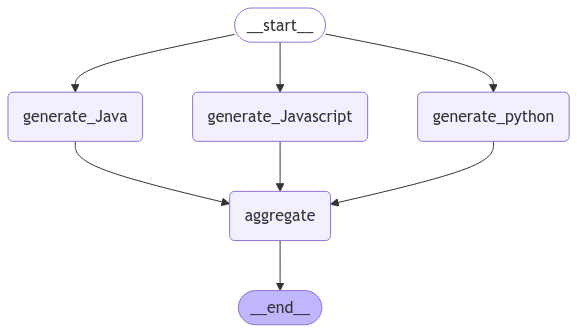

In [11]:
parallel_workflow = StateGraph(State)

parallel_workflow.add_node("generate_Java", generate_code_Java)
parallel_workflow.add_node("generate_python", generate_code_python)
parallel_workflow.add_node("generate_Javascript", generate_code_Javascript)
# parallel_workflow.add_node("analyze", analyze_code)
# parallel_workflow.add_node("refine", refine_code)
parallel_workflow.add_node("aggregate", aggregate_code)

# workflow.add_node("generate", generate_code)
# workflow.add_node("analyze", analyze_code)
# workflow.add_node("refine", refine_code)

parallel_workflow.add_edge(START, "generate_Java")
parallel_workflow.add_edge(START, "generate_python")
parallel_workflow.add_edge(START, "generate_Javascript")  
# parallel_workflow.add_edge("generate_Java","analyze")
# parallel_workflow.add_edge("generate_python","analyze")
# parallel_workflow.add_edge("generate_Javascript","analyze")
# parallel_workflow.add_conditional_edges("analyze",review_code,{"needs_refinement":"refine","No refinement":"aggregate"})
# parallel_workflow.add_edge("refine", "analyze")
# parallel_workflow.add_edge("refine", "aggregate")
parallel_workflow.add_edge("generate_Java","aggregate")
parallel_workflow.add_edge("generate_python","aggregate")
parallel_workflow.add_edge("generate_Javascript","aggregate")
parallel_workflow.add_edge("aggregate", END)

# workflow.add_edge(START, "generate")
# workflow.add_edge("generate", "review")
# workflow.add_edge("review", "refine")
# workflow.add_edge("generate","analyze")
# workflow.add_conditional_edges("analyze",review_code,{"needs_refinement":"refine","No refinement":END})
# workflow.add_conditional_edges("review", lambda state: "refine" if "syntax error" in state["code"] else END)
# workflow.add_edge("refine", "review")
# workflow.add_edge("refine", END)

chain=parallel_workflow.compile()
display(Image(chain.get_graph().draw_mermaid_png()))

In [15]:
result = chain.invoke({"topic": "function to add two numbers"})


I am here


In [16]:
import pprint
pprint.pprint(result)

{'Java_code': 'Sure, below is a simple Java function that adds two numbers and '
              'returns the result. This example includes a basic main method '
              'to demonstrate how to call this function and print the result.\n'
              '\n'
              '```java\n'
              'public class AddNumbers {\n'
              '\n'
              '    // Method to add two numbers\n'
              '    public static int add(int num1, int num2) {\n'
              '        return num1 + num2;\n'
              '    }\n'
              '\n'
              '    // Main method to test the add function\n'
              '    public static void main(String[] args) {\n'
              '        int number1 = 5;\n'
              '        int number2 = 7;\n'
              '        int sum = add(number1, number2);\n'
              '        System.out.println("The sum of " + number1 + " and " + '
              'number2 + " is: " + sum);\n'
              '    }\n'
              '}\n'
       